In [10]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

from vector_mapping import VectorMap

In [2]:
px, py = [0.2, 0.4], [0.6, 0.6]
qx, qy = [0.5, 0.5], [0.7, 0.1]

px, py, qx, qy = np.atleast_1d(px, py, qx, qy)

wt = [1, 1]
gt = [0.3, 0.3]

x1, y1 = np.linspace(0, 1, 11), np.linspace(0, 1, 11)
x = np.meshgrid(x1, y1)

vm = VectorMap(px, py, qx, qy, wt, gt)

In [3]:
v = vm.velocity_func()

In [4]:
v(x).shape

(2, 11, 11)

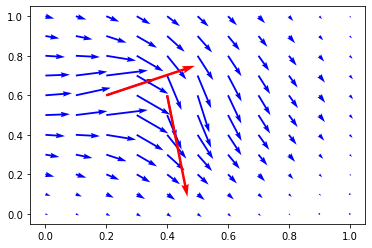

In [7]:
plt.quiver(*x, *v(x), color='blue', scale_units='xy')
plt.quiver(px, py, qx-px, qy-py, color='red', scale_units='xy', scale=1)

<IPython.core.display.Javascript object>


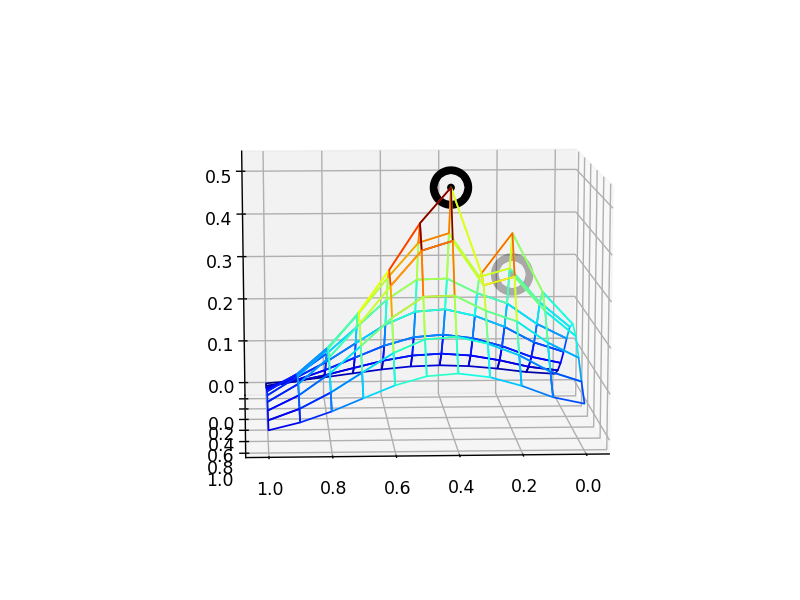

In [11]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(px, py, vm.sample_vector_magnitudes(), marker='o', color='black', linewidths=20)

vx = np.linalg.norm(v(x), axis=0)

# Normalize the colors based on Z value
norm = plt.Normalize(vx.min(), vx.max())
colors = cm.jet(norm(vx))
surf = ax.plot_surface(x[0], x[1], vx, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

<IPython.core.display.Javascript object>


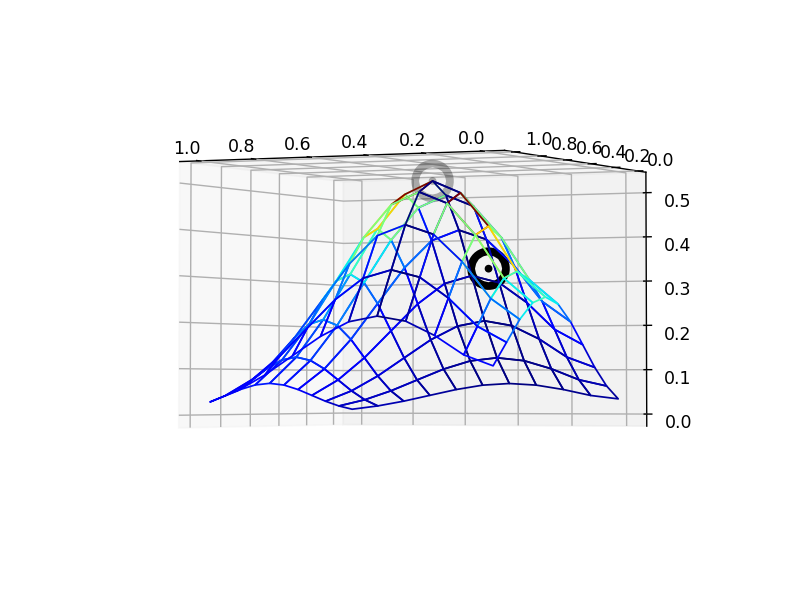

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(px, py, vm.sample_vector_magnitudes(), marker='o', color='black', linewidths=20)

vx = np.linalg.norm(vm._unscaled_velocity_func()(x), axis=0)

# Normalize the colors based on Z value
norm = plt.Normalize(vx.min(), vx.max())
colors = cm.jet(norm(vx))
surf = ax.plot_surface(x[0], x[1], vm._scaling_func()(x), facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))